In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
def slotMachine10(max_size):
 for choice in random.choices([10, 0], weights=[0.4, 0.6], k=max_size):
  yield choice

def slotMachine100(max_size):
  for choice in random.choices([100, 0], weights=[0.03, 0.97], k=max_size):
    yield choice

$$Q_k = Q_{k-1} + \frac{1}{k}(r_{k} - Q_{k-1})$$

In [ ]:
MAX_ITERS = int(1e4)

def approximate(generator, learning_rate, epsilon = 1e-7, max_iters = MAX_ITERS):
  memo = [0]
  iter = 0
  for res in generator:
    iter += 1
    memo.append(memo[iter - 1] + learning_rate(iter) * (res - memo[iter - 1]))
    if (iter > 1000 and abs(memo[iter] - memo[iter - 1]) < epsilon) or iter >= max_iters:
      break
  return memo

def do_approximate(learning_rate):
  res1 = approximate(slotMachine10(MAX_ITERS), learning_rate)
  res2 = approximate(slotMachine100(MAX_ITERS), learning_rate)

  # Show Results
  iters_range = np.arange(len(res1))
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].set_title(f"Slot Machine ($10)")
  axes[0].plot(iters_range,
                res1,
                'salmon',
                linewidth=2)
  iters_range = np.arange(len(res2))
  axes[1].set_title(f"Slot Machine ($100)")
  axes[1].plot(iters_range,
               res2,
               'blue',
               linewidth=2);
  print("Slot Machine ($10)")
  print(f"Iters: {len(res1)}")
  print(f"Predicition: {res1[-1]}")
  print("Slot Machine ($100)")
  print(f"Iters: {len(res2)}")
  print(f"Predicition: {res2[-1]}")

Slot Machine ($10)
Iters: 10001
Predicition: 4.024999999999984
Slot Machine ($100)
Iters: 10001
Predicition: 2.959999999999994


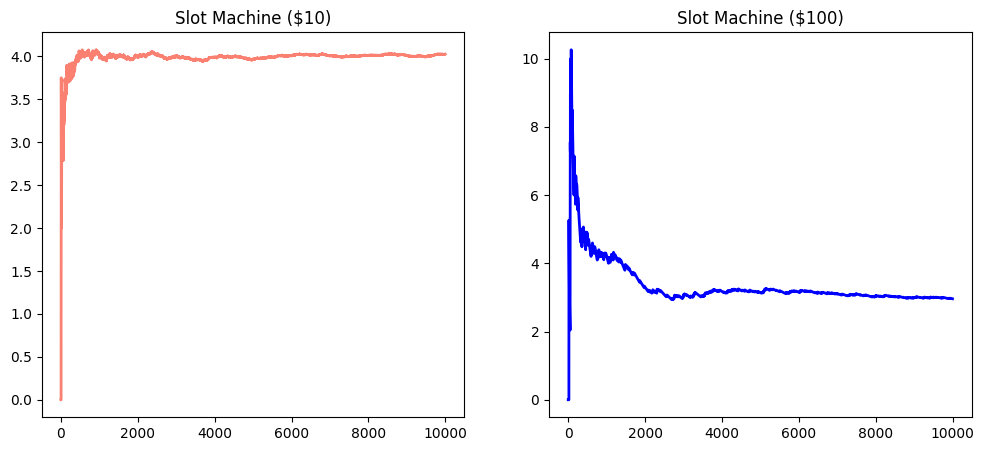

In [ ]:
# Learning rate 1 / t
do_approximate(lambda x: 1/x)

Slot Machine ($10)
Iters: 10001
Predicition: 1.7228531180917055
Slot Machine ($100)
Iters: 8882
Predicition: 8.369814772935169e-07


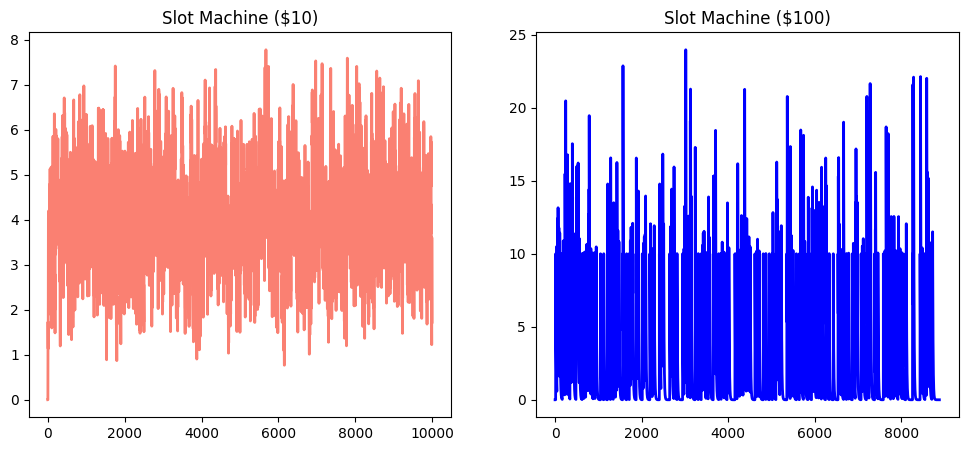

In [ ]:
# Learning rate 0.1
do_approximate(lambda x: 0.1)

Slot Machine ($10)
Iters: 10001
Predicition: 4.10013381802635
Slot Machine ($100)
Iters: 10001
Predicition: 5.016765575896259


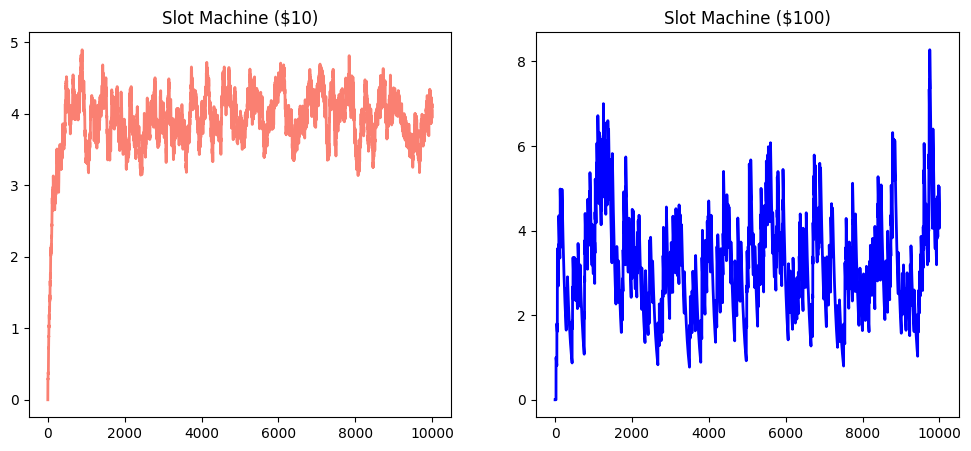

In [ ]:
# Learning rate 0.01
do_approximate(lambda x: 0.01)

Slot Machine ($10)
Iters: 10001
Predicition: 4.0169299704218036
Slot Machine ($100)
Iters: 10001
Predicition: 3.0877601672569086


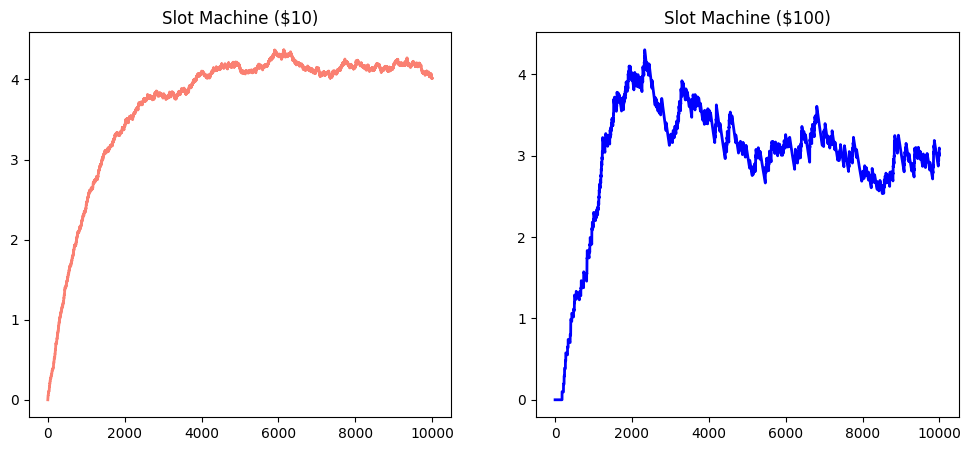

In [ ]:
# Learning rate 0.001
do_approximate(lambda x: 0.001)